<a href="https://colab.research.google.com/github/argewar/FEC-2025/blob/main/Teste_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

In [2]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

keras e imports

In [3]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!tar -xvf images.tar
!rm images.tar
!ls images

A saída de streaming foi truncada nas últimas 5000 linhas.
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n02109047-Great_Dane/n02109047_8090.jpg
I

In [4]:
root = 'Images'
exclude = ['n02109047-Great_Dane','n02111129-Leonberg', 'n02089973-English_foxhound', 'n02116738-African_hunting_dog', 'n02115913-dhole', 'n02109525-Saint_Bernard', 'n02109961-Eskimo_dog', 'n02110185-Siberian_husky', 'n02110627-affenpinscher', 'n02110806-basenji',
           'n02097298-Scotch_terrier', 'n02105855-Shetland_sheepdog', 'n02113712-miniature_poodle', 'n02099429-curly-coated_retriever', 'n02106382-Bouvier_des_Flandres', 'n02111500-Great_Pyrenees', 'n02088632-bluetick', 'n02102973-Irish_water_spaniel', 'n02102177-Welsh_springer_spaniel',
           'n02085936-Maltese_dog', 'n02106550-Rottweiler', 'n02099267-flat-coated_retriever', 'n02102040-English_springer', 'n02089078-black-and-tan_coonhound', 'n02091244-Ibizan_hound', 'n02106382-Bouvier_des_Flandres', 'n02093991-Irish_terrier', 'n02092339-Weimaraner', 'n02096294-Australian_terrier', 'n02099267-flat-coated_retriever',
           'n02102973-Irish_water_spaniel', 'n02112137-chow', 'n02105056-groenendael','n02088094-Afghan_hound','n02091032-Italian_greyhound', 'n02113978-Mexican_hairless', 'n02113023-Pembroke', 'n02105505-komondor', 'n02111889-Samoyed', 'n02090721-Irish_wolfhound', 'n02092002-Scottish_deerhound', 'n02105412-kelpie', 'n02085782-Japanese_spaniel', 'n02106030-collie', 'n02107683-Bernese_mountain_dog', 'n02094433-Yorkshire_terrier',
           'n02094258-Norwich_terrier', 'n02107574-Greater_Swiss_Mountain_dog', 'n02100735-English_setter', 'n02111277-Newfoundland', 'n02091467-Norwegian_elkhound', 'n02100877-Irish_setter', 'n02104365-schipperke', 'n02097047-miniature_schnauzer', 'n02090622-borzoi', 'n02108000-EntleBucher', 'n02099712-Labrador_retriever', 'n02087394-Rhodesian_ridgeback', 'n02112137-chow', 'n02098105-soft-coated_wheaten_terrier', 'n02096051-Airedale', 'n02088364-beagle', 'n02086910-papillon', 'n02088094-Afghan_hound', 'n02105056-groenendael', 'n02091032-Italian_greyhound',
           'n02105641-Old_English_sheepdog', 'n02113799-standard_poodle',
           'n02108089-boxer', 'n02110958-pug', 'n02090379-redbone', 'n02095314-wire-haired_fox_terrier', 'n02113624-toy_poodle', 'n02098413-Lhasa', 'n02107312-miniature_pinscher', 'n02091831-Saluki', 'n02085620-Chihuahua', 'n02101388-Brittany_spaniel', 'n02088466-bloodhound', 'n02086079-Pekinese', 'n02106662-German_shepherd', 'n02096585-Boston_bull', 'n02107908-Appenzeller', 'n02097474-Tibetan_terrier', 'n02102480-Sussex_spaniel', 'n02108915-French_bulldog', 'n02105251-briard', 'n02101556-clumber', 'n02096437-Dandie_Dinmont', 'n02086646-Blenheim_spaniel',
           'n02112350-keeshond', 'n02099849-Chesapeake_Bay_retriever', 'n02087046-toy_terrier', 'n02112018-Pomeranian', 'n02097130-giant_schnauzer', 'n02108422-bull_mastiff', 'n02105162-malinois', 'n02091134-whippet', 'n02095889-Sealyham_terrier', 'n02107142-Doberman', 'n02110063-malamute', 'n02096177-cairn', 'n02100583-vizsla', 'n02086240-Shih-Tzu', 'n02102318-cocker_spaniel', 'n02100236-German_short-haired_pointer', 'n02112706-Brabancon_griffon', 'n02108551-Tibetan_mastiff', 'n02093754-Border_terrier', 'n02097658-silky_terrier', 'n02093647-Bedlington_terrier', 'n02093256-Staffordshire_bullterrier', 'n02104029-kuvasz', 'n02093428-American_Staffordshire_terrier',
           'n02088238-basset', 'n02097209-standard_schnauzer']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['Images/n02089867-Walker_hound', 'Images/n02115641-dingo', 'Images/n02113186-Cardigan', 'Images/n02091635-otterhound', 'Images/n02099601-golden_retriever', 'Images/n02093859-Kerry_blue_terrier', 'Images/n02095570-Lakeland_terrier', 'Images/n02098286-West_Highland_white_terrier', 'Images/n02106166-Border_collie', 'Images/n02094114-Norfolk_terrier', 'Images/n02101006-Gordon_setter']


In [5]:
def get_image(path):
    img = load_img(path, target_size=(224, 224)) #Use tf.keras.utils.load_img instead
    x = img_to_array(img) #Use tf.keras.utils.img_to_array instead
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [6]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)
print(categories)
random.shuffle(data)


['Images/n02089867-Walker_hound', 'Images/n02115641-dingo', 'Images/n02113186-Cardigan', 'Images/n02091635-otterhound', 'Images/n02099601-golden_retriever', 'Images/n02093859-Kerry_blue_terrier', 'Images/n02095570-Lakeland_terrier', 'Images/n02098286-West_Highland_white_terrier', 'Images/n02106166-Border_collie', 'Images/n02094114-Norfolk_terrier', 'Images/n02101006-Gordon_setter']


In [7]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [8]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[7, 5, 3, 10, 4, 10, 0, 0, 1, 7, 7, 8, 10, 4, 4, 6, 6, 8, 8, 6, 2, 5, 4, 6, 0, 10, 10, 8, 6, 0, 10, 10, 6, 10, 1, 4, 4, 6, 9, 0, 10, 10, 6, 0, 0, 0, 4, 7, 10, 5, 7, 7, 7, 3, 8, 1, 6, 1, 10, 5, 7, 5, 1, 6, 1, 4, 10, 2, 9, 3, 9, 6, 0, 1, 10, 5, 10, 5, 5, 0, 9, 10, 9, 4, 6, 6, 9, 4, 9, 5, 1, 1, 3, 2, 10, 8, 7, 10, 6, 9, 5, 9, 0, 8, 3, 9, 3, 1, 1, 0, 1, 8, 4, 4, 7, 8, 2, 3, 9, 9, 2, 5, 9, 1, 2, 10, 3, 2, 3, 3, 2, 8, 9, 5, 6, 8, 10, 9, 1, 6, 2, 9, 3, 1, 4, 3, 3, 8, 3, 4, 0, 0, 8, 8, 2, 8, 9, 4, 3, 6, 6, 0, 0, 0, 2, 6, 0, 3, 0, 3, 3, 6, 8, 6, 7, 8, 0, 5, 1, 2, 6, 7, 5, 0, 4, 7, 5, 8, 7, 9, 6, 5, 9, 6, 2, 3, 8, 10, 5, 4, 9, 6, 8, 1, 2, 5, 2, 10, 1, 9, 0, 10, 6, 10, 9, 3, 0, 6, 4, 5, 9, 4, 10, 0, 5, 2, 10, 7, 10, 8, 4, 4, 6, 3, 5, 8, 9, 2, 2, 9, 0, 6, 6, 9, 5, 9, 0, 7, 1, 1, 6, 2, 10, 2, 8, 7, 1, 10, 6, 2, 3, 6, 1, 0, 5, 6, 7, 4]


In [9]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(268, 11)


In [10]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 1785 images from 11 categories
train / validation / test split: 1249, 268, 268
training data shape:  (1249, 224, 224, 3)
training labels shape:  (1249, 11)


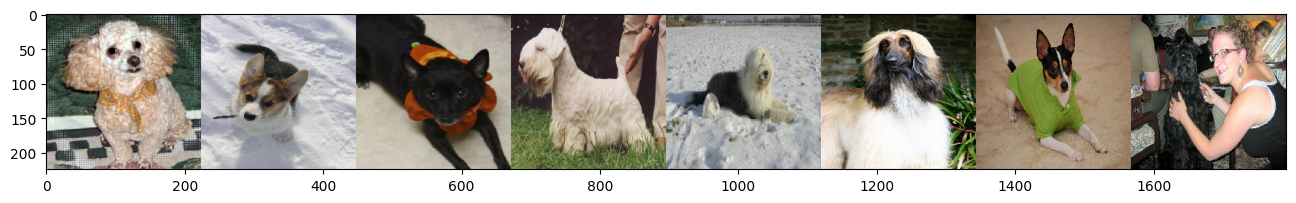

In [11]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [12]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                   

In [13]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
10/10 [==============================] - 104s 10s/step - loss: 2.4141 - accuracy: 0.0985 - val_loss: 2.3943 - val_accuracy: 0.1567
Epoch 2/10
10/10 [==============================] - 96s 10s/step - loss: 2.3655 - accuracy: 0.1505 - val_loss: 2.3153 - val_accuracy: 0.1418
Epoch 3/10
10/10 [==============================] - 109s 11s/step - loss: 2.2254 - accuracy: 0.1898 - val_loss: 2.0849 - val_accuracy: 0.2313
Epoch 4/10
10/10 [==============================] - 108s 10s/step - loss: 2.0773 - accuracy: 0.2474 - val_loss: 2.0009 - val_accuracy: 0.3022
Epoch 5/10
10/10 [==============================] - 97s 10s/step - loss: 1.9449 - accuracy: 0.3074 - val_loss: 1.8680 - val_accuracy: 0.3097
Epoch 6/10
10/10 [==============================] - 96s 10s/step - loss: 1.8789 - accuracy: 0.3371 - val_loss: 1.8540 - val_accuracy: 0.3396
Epoch 7/10
10/10 [==============================] - 102s 10s/step - loss: 1.8057 - accuracy: 0.3659 - val_loss: 1.7963 - val_accuracy: 0.3694
Epoch 8/1

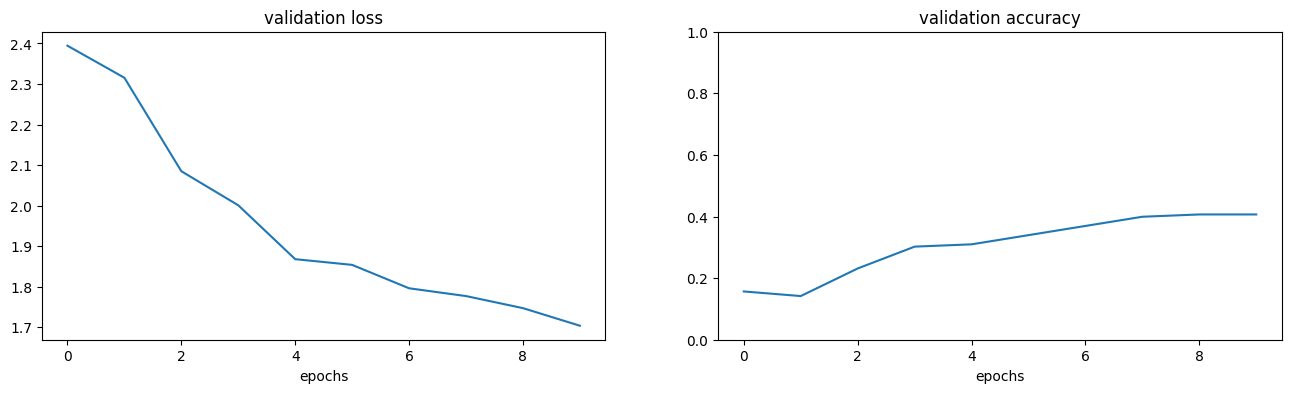

In [14]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.751020073890686
Test accuracy: 0.444029837846756


In [16]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 10s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [17]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


In [18]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))

Epoch 1/10
10/10 [==============================] - 879s 90s/step - loss: 2.6801 - accuracy: 0.1473 - val_loss: 2.3530 - val_accuracy: 0.2276
Epoch 2/10
10/10 [==============================] - 877s 90s/step - loss: 2.1700 - accuracy: 0.2498 - val_loss: 1.9608 - val_accuracy: 0.3396
Epoch 3/10
10/10 [==============================] - 882s 90s/step - loss: 1.8706 - accuracy: 0.3771 - val_loss: 1.8302 - val_accuracy: 0.3545
Epoch 4/10
10/10 [==============================] - 816s 83s/step - loss: 1.6927 - accuracy: 0.4452 - val_loss: 1.7301 - val_accuracy: 0.4179
Epoch 5/10
10/10 [==============================] - 815s 83s/step - loss: 1.5547 - accuracy: 0.5212 - val_loss: 1.5643 - val_accuracy: 0.5037
Epoch 6/10
10/10 [==============================] - 872s 89s/step - loss: 1.4175 - accuracy: 0.5845 - val_loss: 1.4519 - val_accuracy: 0.5336
Epoch 7/10
10/10 [==============================] - 871s 89s/step - loss: 1.3507 - accuracy: 0.5981 - val_loss: 1.3981 - val_accuracy: 0.5672
Epoch 

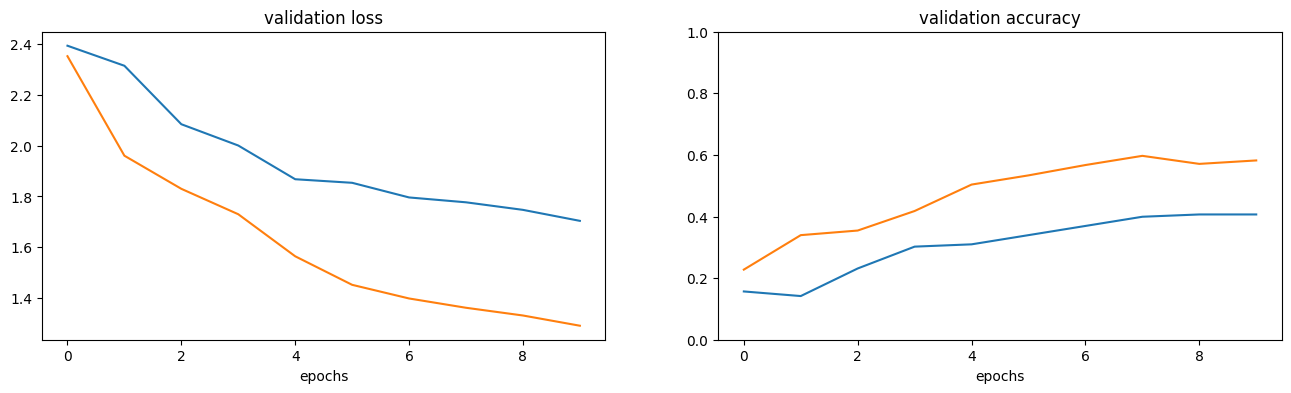

In [21]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [22]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.25629460811615
Test accuracy: 0.5932835936546326


In [38]:
img, x = get_image('Images/n02091635-otterhound/n02091635_1102.jpg')
probabilities = model_new.predict([x])
print(probabilities)
max_prob = np.max(probabilities)
print(max_prob)

1/1 [==============================] - 1s 524ms/step
[[1.1556367e-15 2.8145101e-15 8.8401816e-16 9.9966633e-01 5.2921114e-05
  2.0576096e-10 3.4088707e-08 7.6657222e-11 1.6760302e-15 2.8078663e-04
  9.4984569e-11]]
0.99966633


fatal: not a git repository (or any of the parent directories): .git
